## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

## Make train dataset

In [2]:
X, y = make_regression(n_samples=1000, n_features=5, noise=5, random_state=4)
X.shape, y.shape

((1000, 5), (1000,))

## Create a class for Linear Regression

In [3]:
class RegressionMSE:
    
    def __init__(self, learning_rate=0.001, max_iterations=1000):
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        # history variables
        self.iters_list = []
        self.mse_list = []

    
    def fit(self, X, y):
        # initial parameters
        self.intercept = 0
        self.betas = np.zeros(X.shape[1])
        # sample data parameters
        n_observations = X.shape[0]
        iteration = 0
        # y_hat is a predicted value of y
        y_hat = self.predict(X)
        # aka ostanova criterion to stop fitting when the error is too big
        mse_start = 1e+5
        # just to get inside the loop
        mse_ = 0
        while (iteration <= self.max_iterations) and (mse_ < mse_start):
            iteration += 1
            y_hat = self.predict(X)
            # partial derivatives with respect to each coefficient
            derivative_intercept = (1/n_observations) * np.sum(2 * (y_hat - y))
            #derivative_betas = (1/n_observations) * X.T.dot(2 * (y_hat - y)) # the same result
            derivative_betas = (1/n_observations) * (2 * (y_hat - y)).dot(X)
            # betas update
            self.intercept = self.intercept - self.learning_rate * derivative_intercept
            self.betas = self.betas - self.learning_rate * derivative_betas
            # mse calculation
            mse_ = self.mse(y, y_hat)
            # history writing
            self.iters_list.append(iteration)
            self.mse_list.append(mse_)
    
    
    def predict(self, X):
        return X.dot(self.betas) + self.intercept
    
    
    def mse(self, y, y_hat):
        return np.mean((y - y_hat)**2)        
    
    
    def show_history(self):
        return pd.DataFrame({'iteration':self.iters_list, 'mse':self.mse_list})

In [4]:
reg = RegressionMSE(learning_rate=0.01, max_iterations=2000)

In [5]:
reg.fit(X, y)

In [6]:
reg.intercept

-0.035049583015088745

In [7]:
reg.betas

array([28.48905985, 98.34806521, 95.21017824,  9.06507806, 63.31885368])

In [8]:
preds = reg.predict(X)

In [9]:
reg.mse(y, preds)

26.122356484346156

In [10]:
hist = reg.show_history()

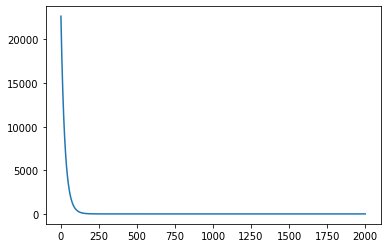

In [11]:
plt.plot(hist['iteration'], hist['mse']) # obviously we would stop the fitting much earlier

## Scikit-learn regression

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [13]:
linreg = LinearRegression()

In [14]:
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
linreg.intercept_

-0.03504958301507566

In [16]:
linreg.coef_

array([28.48905985, 98.34806521, 95.21017824,  9.06507806, 63.31885368])

In [17]:
pred_sklearn = linreg.predict(X)

In [18]:
reg.mse(y, pred_sklearn), mean_squared_error(y, pred_sklearn) # MSE calculated correctly

(26.122356484346177, 26.122356484346177)

### The same coefficients were obtained. That's good!